<a href="https://colab.research.google.com/github/zzhining/python_basic/blob/master/answer/python_exercise_2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제어문


## IF문
Q1. 다음 코드의 결과값은 무엇일까?
```
a = "Life is too short, you need python"

if "wife" in a:
    print("wife")

elif "python" in a and "you" not in a:
    print("python")

elif "shirt" not in a:
    print("shirt")

elif "need" in a:
    print("need")

else: print("none")
```

In [1]:
a = "Life is too short, you need python"

if "wife" in a:
    print("wife")

elif "python" in a and "you" not in a:
    print("python")

elif "shirt" not in a:
    print("shirt")

elif "need" in a:
    print("need")

else: print("none")

shirt


결과는 shirt

Q2. 휴대폰 번호 앞자리에 따라 통신사는 아래와 같이 구분된다.   
사용자로부터 휴대전화 번호를 입력 받고, 통신사를 출력하는 프로그램을 작성하라.

번호	통신사  
011	SKT  
016	KT  
019	LGU  
010	알수없음

```
>> 휴대전화 번호 입력: 011-345-1922
당신은 SKT 사용자입니다.
```


In [13]:
def telecom(number):
    result = ''
    if number[:3] == '011':
        result =  'SKT'
    elif number[:3] == '016':
        result = 'KT'
    elif number[:3] == '019':
        result = 'LG'
    elif number[:3] == '010':
        result = '알 수 없는'
    return f'당신은 {result} 사용자입니다.'


phone_number = input('휴대전화 번호 입력: ')
telecom(phone_number)

휴대전화 번호 입력:  016-777-7777


'당신은 KT 사용자입니다.'

In [15]:
# pythonic

def get_carrier(phone_number):
    # 통신사 정보를 딕셔너리로 매핑
    carrier_dict = {
        '011': 'SKT',
        '016': 'KT',
        '019': 'LGU',
        '010': '알수없음'
    }
    
    # 번호의 앞자리를 추출
    prefix = phone_number.split('-')[0]
    
    # 통신사 정보 가져오기
    # get(조회하고자 하는 딕셔너리 키)  
    # carrier = carrier_dict[prefix]
    carrier = carrier_dict.get(prefix, '알수없음')
    
    
    return f"당신은 {carrier} 사용자입니다."

phone_number = input("휴대전화 번호 입력: ")
print(get_carrier(phone_number))

휴대전화 번호 입력:  010-7


당신은 알수없음 사용자입니다.


Q3. 주민등록번호는 13자리로 구성되는데 마지막 자리수는 주민등록번호의 유효성을 체크하는데 사용된다.  
먼저 앞에서부터 12자리의 숫자에 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5를 차례로 곱한 뒤 그 값을 전부 더한다.    
연산 결과 값을 11로 나누면 나머지가 나오는데 11에서 나머지를 뺀 값이 주민등록번호의 마지막 번호가 된다.  

```
  8 2 1 0 1 0 - 1 6 3 5 2 1 0
x 2 3 4 5 6 7   8 9 2 3 4 5 
-----------------------------
1차 계산: (8*2 + 2*3 + 1*4 + 0*5 + 1*6 + 0*7 + 1*8 + 6*9 + 3*2 + 5*3 + 2*4 + 1*5) = (128 % 11) = 7
2차 계산: 11 -7 = 4

>> 주민등록번호: 821010-1635210
유효하지 않은 주민등록번호입니다. 


```



In [38]:
def id_number(n):
    
     # -기호 제거
    n = n.replace('-', '')
    
    multiply_list = [2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5]
    result = 0
    last_num = int(n[-1])
    n = n[:-1]

    # 인덱스 활용하기
    for i in range(len(n)):
        result += int(n[i]) * multiply_list[i]  

    remainder = 11 - result % 11

    if remainder == last_num:
        return '유효한 주민등록번호입니다.'
    else:
        return '유효하지 않은 주민등록번호입니다.'

my_id = input('주민등록번호: ')
print(id_number(my_id))

주민등록번호:  821010-1635210


유효하지 않은 주민등록번호입니다.


# request 라이브러리
- Python에서 HTTP 요청을 쉽게 보내고 응답을 처리할 수 있도록 도와주는 라이브러리

```python
import requests

# Get 요청 : 서버에서 데이터 가져오기
response = requests.get('https://api.example.com/data')
data = response.json()  # JSON 형식으로 응답을 파싱

# Post 요청 : 서버에 데이터 전송
data = {'key': 'value'}
response = requests.post('https://api.example.com/data', json=data)

# Put 요청 : 서버의 데이터 업데이트
data = {'key': 'new_value'}
response = requests.put('https://api.example.com/data/1', json=data)

# Delete 요청 : 서버의 데이터 삭제
response = requests.delete('https://api.example.com/data/1')

# 응답 처리
if response.status_code == 200:
    print("Success!")
```


Q4. 아래 코드는 비트코인의 가격 정보를 딕셔너리로 가져오는 코드이다.
```
import requests
btc = requests.get("https://api.bithumb.com/public/ticker/").json()['data']
```
btc 딕셔너리 안에는 시가, 종가, 최고가, 최저가 등이 저장되어 있다.   
최고가와 최저가의 차이를 변동폭으로 정의할 때 (시가 + 변동폭)이 최고가 보다 높을 경우 "상승장", 그렇지 않은 경우 "하락장" 문자열을 출력하라.
```
Key Name	Description
opening_price	최근 24시간 내 시작 거래금액
closing_price	최근 24시간 내 마지막 거래금액
min_price	최근 24시간 내 최저 거래금액
max_price	최근 24시간 내 최고 거래금액
```

In [40]:
import requests

btc = requests.get("https://api.bithumb.com/public/ticker/").json()['data']

# 필요한 데이터 추출
opening_price = float(btc['opening_price'])
max_price = float(btc['max_price'])
min_price = float(btc['min_price'])

# 변동폭 계산
volatility = max_price - min_price

# 상승장 또는 하락장 판단
if (opening_price + volatility) > max_price:
    print("상승장")
else:
    print("하락장")

상승장


## While문
<mark>Q1. while문을 이용하여 아래와 같이 별(*)을 표시하는 프로그램을 작성해보자</mark>

```
결과값
*
**
***
****
*****
```


In [42]:
cnt = 0
while cnt < 5:
    cnt += 1
    print('*' * cnt)

*
**
***
****
*****


## For 문

<mark>Q1. A학급에 총 10명의 학생이 있다. 이 학생들의 중간고사 점수는 다음과 같다</mark>

[70, 60, 55, 75, 95, 90, 80, 80, 85, 100]

for문을 이용하여 A학급의 평균 점수를 구해 보자

In [45]:
lst = [70, 60, 55, 75, 95, 90, 80, 80, 85, 100]
avg = sum(i for i in lst) / len(lst)
avg

79.0

<mark>Q2. 리스트에는 3일 간의 ohlc 데이터가 저장돼 있다. 시가에 매수해서 종가에 매도 했을 경우 총 수익금을 계산하라.</mark>

```
ohlc = [["open", "high", "low", "close"],
        [100, 110, 70, 100],
        [200, 210, 180, 190],
        [300, 310, 300, 310]]
   ```

1일차 수익 0원 (100 - 100), 2일차 수익 -10원 (190 - 200), 3일차 수익 10원 (310 - 300) 이다.

`
0
`
        

In [49]:
ohlc = [["open", "high", "low", "close"],
        [100, 110, 70, 100],
        [200, 210, 180, 190],
        [300, 310, 300, 310]]

profit = 0
for i in ohlc[1:]:
    profit += i[3] - i[0]
print(profit)

0


# 함수

## 피보나치 수열


Q1. 첫번째 항의 값이 0이고 두 번째 항의 값이 1일때, 이후에 이어지는 항들은 이전의 두 항을 더한 값으로 이루어지는 수열을 피보나치 수열이라고 한다.

0, 1, 1, 2, 3, 5, 8, 13, ...

입력을 정수n으로 받았을 때, n 개의 피보나치 수열을 출력하는 함수를 작성해보자

In [74]:
def fibo(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0,1]

    fibo_list = [0, 1]
    for i in range(2, n):
        next_value = fibo_list[-1] + fibo_list[-2]
        fibo_list.append(next_value)
    print(*fibo_list, sep = ', ')  # 언패킹
        
fibo(5)

0, 1, 1, 2, 3


## 문자열 압축하기
Q2. 문자열을 입력 받아 같은 문자가 연속적으로 반복되는 경우에 그 반복 횟수를 표시해 문자열을 압축하여 표시해 보자

> 입력예시: aaabbcccccca

> 출력예시: a3b2c6a1

In [76]:
#'코드를 작성하시오'
def compress_string(s):
    if not s:
        return ''

    compressed = []
    count = 1  # 첫 번째 문자 카운트

    # 문자열의 두 번째 문자부터 비교
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            count += 1
        else:
            compressed.append(s[i-1] + str(count))
            count = 1  # 카운트 초기화
    compressed.append(s[-1] + str(count))

    return ''.join(compressed)
        
compress_string('aaabbcccccca')

'a3b2c6a1'

In [ ]:
# 작성 예시
# "aaabbcccccca"
def compress_string(s):
  result = s[0]  # 첫번째 값을 결과에 넣는다
  count  = 0   #

  for st in s:
    if st == result[-1]:  #
        count += 1
    else:
        result += str(count) + st
        count = 1
  result += str(count)

  return result

In [ ]:
print(compress_string("aaabbcccccca"))

## Duplicate Numbers
Q3. 0 ~ 9 까지의 문자로 된 숫자를 입력받았을 때, 이 입력값이 0 ~ 9까지의 모든 숫자가 각각 한 번씩만 사용된 것인지 확인하는 함수를 작성해 보자.

>입력예시 : 0123456789 01234 01234567890 6789012345 012322456789

>출력예시 : true false false true false

In [82]:
#'코드를 작성하시오'
def chkDupNum(s):
    numbers = s.split(' ')
    results = []
    
    for i in numbers:
        if len(i) == 10 and set(i) == set('0123456789'):
            results.append(True)
        else:
            results.append(False)
    return results

print(chkDupNum("0123456789"))
print(chkDupNum("01234"))
print(chkDupNum("01234567890"))
print(chkDupNum("6789012345"))
print(chkDupNum("012322456789"))

[True]
[False]
[False]
[True]
[False]


In [ ]:
## 작성 예시

def chkDupNum(s):
  result=[]
  for num in s:
        if num not in result:
            result.append(num)
        else:
            return False
  return len(result)==10

In [ ]:
print(chkDupNum("0123456789"))
print(chkDupNum("01234"))
print(chkDupNum("01234567890"))
print(chkDupNum("6789012345"))
print(chkDupNum("012322456789"))

Q4. 콤마가 포함된 문자열 숫자를 입력받아 정수로 변환하는 convert_int 함수를 정의하라.

```
convert_int("1,234,567")
1234567
```

# 프로그램 구조

## 클래스
Q1. 다음과 같이 동작하는 클래스 Calculator를 작성해 보자.

>cal1 = Calculator([1,2,3,4,5])

>cal1.sum() # 15

>cal1.avg() # 3.0

>cal2 = Calculator([6,7,8,9,10])

>cal2.sum() # 40

> cal2.avg() #8.0

In [ ]:
class Calculator:
  def __init(self, numberList):
    self.numberList = numberList

  def sum(self):
    '코드를 작성하시오'

  def avg(self):
    '코드를 작성하시오'



In [ ]:
## 작성 예시
class Calculator:
    def __init__(self, numberList):
        self.numberList = numberList

    def sum(self):
        result = 0
        for num in self.numberList:
            result += num
        return result

    def avg(self):
        total = self.sum()
        return total / len(self.numberList)

In [ ]:
cal1 = Calculator([1,2,3,4,5])
print(cal1.sum()) # 15
print(cal1.avg()) # 3.0

In [ ]:
cal2 = Calculator([6,7,8,9,10])
print(cal2.sum()) # 40
print(cal2.avg()) #8.0

Q2. Account 클래스
은행에 가서 계좌를 개설하면 은행이름, 예금주, 계좌번호, 잔액이 설정됩니다.  
Account 클래스를 생성한 후 생성자를 구현해보세요. 
생성자에서는 예금주와 초기 잔액만 입력 받습니다.  
은행이름은 SC은행으로 계좌번호는 3자리-2자리-6자리 형태로 랜덤하게 생성됩니다.  
```
은행이름: SC은행
계좌번호: 111-11-111111
```

Q2-1. 클래스 변수를 사용해서 Account 클래스로부터 생성된 계좌 객체의 개수를 저장하세요.

그리고 Account 클래스로부터 생성된 계좌의 개수를 출력하는 get_account_num() 메서드를 추가하세요.

Q2-2.  Account 클래스에 입금을 위한 deposit 메서드를 추가하세요. 입금은 최소 1원 이상만 가능합니다.

Account 클래스에 출금을 위한 withdraw 메서드를 추가하세요. 출금은 계좌의 잔고 이상으로 출금할 수는 없습니다.

Q2-3. Account 인스턴스에 저장된 정보를 출력하는 display_info() 메서드를 추가하세요. 잔고는 세자리마다 쉼표를 출력하세요.
```
은행이름: SC은행
예금주: 파이썬
계좌번호: 111-11-111111
잔고: 10,000원
```

Q2-4. 

1. 입금 횟수가 5회가 될 때 잔고를 기준으로 1%의 이자가 잔고에 추가되도록 코드를 변경해보세요.
2. Account 클래스로부터 3개 이상 인스턴스를 생성하고 생성된 인스턴스를 리스트에 저장해보세요.
3. 반복문을 통해 리스트에 있는 객체를 순회하면서 잔고가 100만원 이상인 고객의 정보만 출력하세요.
4. 입금과 출금 내역이 기록되도록 코드를 업데이트 하세요. 입금 내역과 출금 내역을 출력하는 deposit_history와 withdraw_history 메서드를 추가하세요.



## 모듈
Q1. 이전 문제에서 작성한 Calculator 클래스를 calculator.py 라는 파일로 저장하자, 그리고 이 파일을 모듈로 사용하려고 한다. 다음처럼 동작하도록 만들어 보자


In [ ]:
from calculator import Calculator

cal1 = Calculator([1,2,3,4,5])
cal1.sum()

## 파일 입출력

Q1. 바탕화면에 '매수종목1.txt' 파일을 생성한 후 다음과 같이 종목코드를 파일에 써보세요.
```
005930
005380
035420
```

Q2.  바탕화면에 '매수종목2.txt' 파일을 생성한 후 다음과 같이 종목코드와 종목명을 파일에 써보세요.

```
005930 삼성전자
005380 현대차
035420 NAVER
```

Q3. 바탕화면에 '매수종목.csv' 파일을 생성한 후 다음과 같이 종목코드와 종목명을 파일에 써보세요. 
인코딩은 'cp949'를 사용해야합니다.

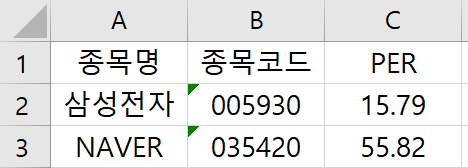

Q4. 파일 읽기

1. 바탕화면에 생성한 '매수종목1.txt' 파일을 읽은 후 종목코드를 리스트에 저장해보세요
2. 바탕화면에 생성한 '매수종목2.txt' 파일을 읽은 후 종목코드와 종목명을 딕셔너리로 저장해보세요. 종목명을 key로 종목명을 value로 저장합니다.


## 예외처리

문자열 PER (Price to Earning Ratio) 값을 실수로 변환할 때 에러가 발생합니다. 예외처리를 통해 에러가 발생하는 PER은 0으로 출력하세요.
```
per = ["10.31", "", "8.00"]
for i in per:
    print(float(i))
```